In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('raw_data/vestiaire.csv')
df.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [6]:
df.describe()

,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,9.005140e+05,900514.000000,900514.000000,900514.000000,900514.000000,900514.000000,886778.000000,9.005140e+05,900514.000000,900514.000000,9.005140e+05,9.005140e+05,900514.000000
mean,3.810003e+07,6.298326,2437.277576,386.862536,331.639409,290.436463,55.486152,1.382227e+07,664.958267,1497.663143,5.623160e+04,9.904618e+03,72.461753
std,7.749403e+06,12.920079,3702.869580,1859.559156,1591.472807,1498.157606,290.259974,7.535593e+06,3552.744596,5460.166852,1.438156e+05,3.557486e+05,34.428663
min,1.113630e+05,0.000000,2.000000,6.130000,5.110000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-180.000000
25%,3.811580e+07,1.000000,66.000000,83.070000,71.360000,58.580000,11.720000,7.977389e+06,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,4.174207e+07,3.000000,341.000000,168.700000,143.780000,125.370000,23.970000,1.438324e+07,34.000000,52.000000,0.000000e+00,7.300000e+01,88.000000
75%,4.267775e+07,7.000000,3266.000000,350.000000,298.200000,261.900000,50.480000,1.946235e+07,178.000000,373.000000,2.539300e+04,2.900000e+02,95.000000
max,4.324884e+07,3154.000000,18237.000000,632610.000000,527175.000000,509229.750000,105435.000000,2.608177e+07,79738.000000,39628.000000,1.064736e+06,1.417912e+07,100.000000


In [8]:
df.isnull().sum()


product_id                         0
product_type                       0
product_name                       0
product_description                7
product_keywords                1183
product_gender_target              0
product_category                1183
product_season                     2
product_condition                  0
product_like_count                 0
sold                               0
reserved                           0
available                          0
in_stock                           0
should_be_gone                     0
brand_id                           0
brand_name                         0
brand_url                          0
product_material                   4
product_color                      1
price_usd                          0
seller_price                       0
seller_earning                     0
seller_badge                       0
has_cross_border_fees          13736
buyers_fees                    13736
warehouse_name                     0
s

In [13]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

product_description           7
product_keywords           1183
product_category           1183
product_season                2
product_material              4
product_color                 1
has_cross_border_fees     13736
buyers_fees               13736
seller_username              39
usually_ships_within     154791
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [10]:
df.dtypes


product_id                      int64
product_type                   object
product_name                   object
product_description            object
product_keywords               object
product_gender_target          object
product_category               object
product_season                 object
product_condition              object
product_like_count            float64
sold                             bool
reserved                         bool
available                        bool
in_stock                         bool
should_be_gone                   bool
brand_id                        int64
brand_name                     object
brand_url                      object
product_material               object
product_color                  object
price_usd                     float64
seller_price                  float64
seller_earning                float64
seller_badge                   object
has_cross_border_fees          object
buyers_fees                   float64
warehouse_na

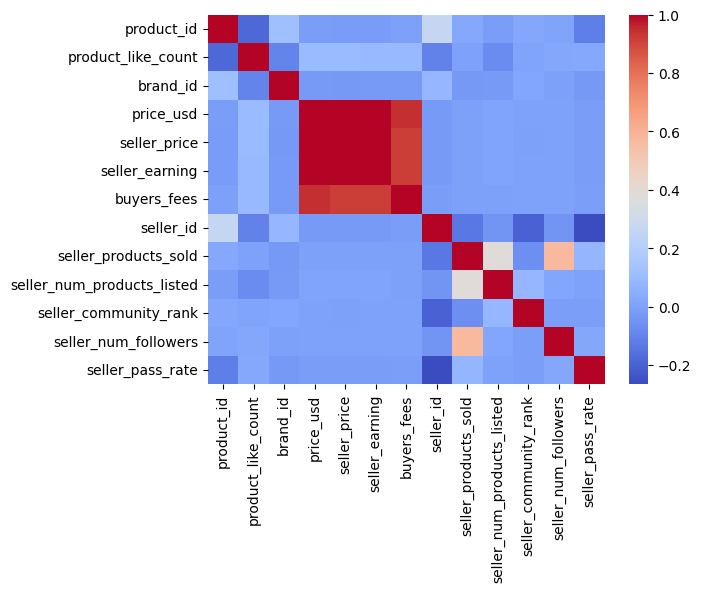

In [18]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm')
plt.show()


<Axes: >

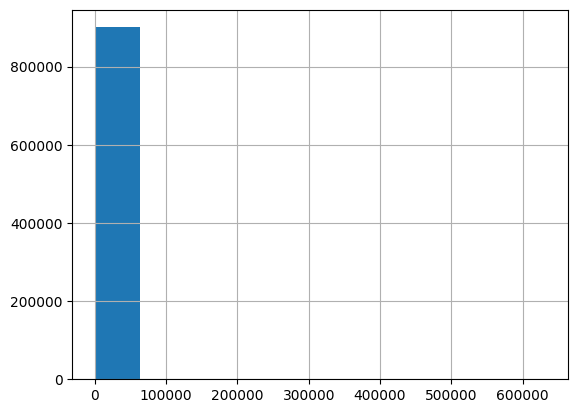

In [15]:
df['price_usd'].hist()

<Axes: >

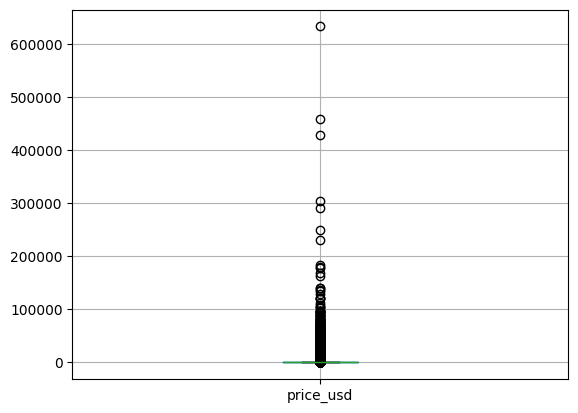

In [16]:
df.boxplot(column='price_usd')


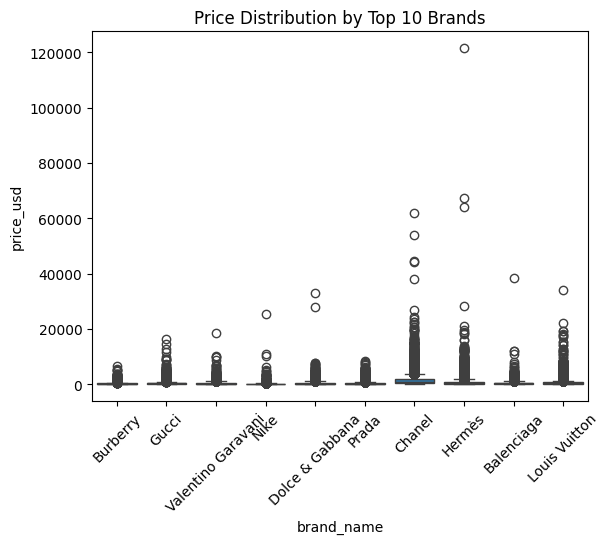

In [22]:
# Boxplot for Brands (only top brands to avoid clutter)
top_brands = df['brand_name'].value_counts().index[:10]  # Select top 10 brands by frequency
sns.boxplot(x='brand_name', y='price_usd', data=df[df['brand_name'].isin(top_brands)])
plt.xticks(rotation=45)
plt.title('Price Distribution by Top 10 Brands')
plt.show()


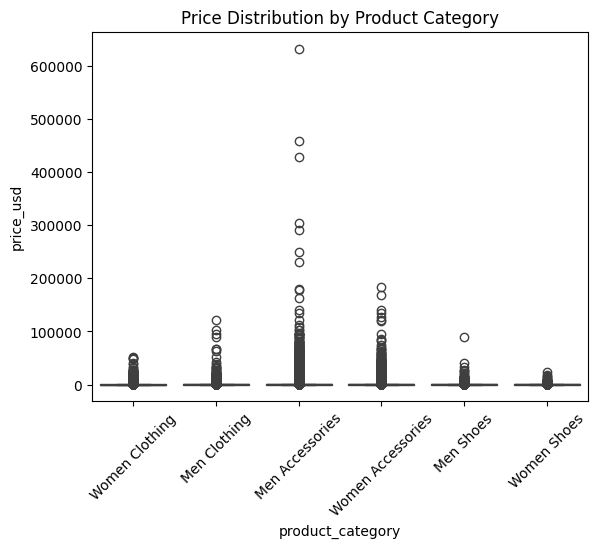

In [23]:
sns.boxplot(x='product_category', y='price_usd', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Product Category')
plt.show()